# 2.1 Unsupervised Machine Learning

## This script includes the following points:

### * Importing libraries and Data.
### * Data Wrangling and Scaling.
### * Perfom Hierarchical Clustering.
### * Principal Component Analysis (PCA).

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [33]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)

In [34]:
#Create a path to where your data is stored.
path = r'C:\Users\IVON6\ClimateWins'

In [35]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))

In [36]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,6.50,0.80,10.90,1,0.81,1.02,0.88,0.00,7.00,3.70,-0.90,7.90,4,0.67,1.02,0.44,0.01,2.30,2.40,-0.40,5.10,7,7.70,0.85,1.00,0.07,0.25,0.00,9.30,7.40,11.00,8,5.40,0.83,1.02,0.12,0.08,0,0.00,10.00,7.00,11.50,8,0.91,0.00,0,0.80,-0.30,1.60,7,0.91,1.00,0.13,0.22,0,0.00,10.60,9.40,8.30,2.90,0.82,1.01,0.28,0.48,1.60,7.90,3.90,9.40,8,1.40,1.00,1.02,0.20,0.00,0.00,-0.60,-1.90,0.50,7,8.70,0.83,1.01,0.22,0.32,1.00,9.50,8.50,11.10,6,0.00,0.92,1.03,0.53,0.00,1.40,7.60,4.40,10.80,5,0.67,0.20,0.10,0,0.00,6.90,1.10,10.40,8,4.00,0.98,1.00,0.04,1.14,0,0.00,4.90,3.80,5.90,3,2.60,0.73,1.02,7.10,7.80,4,4.50,0.73,1.03,0.48,0.01,2.30,-5.90,-8.50,-3.20,5,1.01,0.05,0.32,0.00,4.20,2.20,4.90,3.80,0.76,1.02,1.54,0.44,10.00,7.80,12.20,5,0.88,1.00,0.45,0

In [37]:
climate.tail()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,15.90,11.40,21.40,2,0.68,1.03,1.57,0.18,5.70,18.20,12.10,24.40,4,0.67,1.02,1.41,0.14,5.40,11.70,7.90,16.20,8,3.00,0.84,1.02,1.13,0.22,2.80,15.70,12.80,19.40,8,6.00,0.75,1.02,1.13,0.20,0,6.40,17.80,13.60,21.40,6,0.70,0.12,0,11.50,8.00,15.00,5,0.87,1.01,1.18,0.16,0,1.90,16.40,11.90,18.90,2.40,0.77,1.02,1.14,0.19,4.00,9.10,5.40,13.10,4,0.10,0.80,1.03,1.35,0.37,5.90,14.70,12.10,21.10,8,3.80,0.67,1.02,1.17,0.20,5.30,18.60,14.10,22.60,8,1.70,0.52,1.02,1.89,0.12,5.30,20.00,16.20,23.90,2,0.76,1.37,0.26,0,9.70,14.30,8.30,22.20,8,1.10,0.98,1.01,1.06,0.21,0,0.10,9.70,5.80,12.00,3,1.00,0.73,1.02,7.10,15.40,2,5.70,0.84,1.03,1.56,0.47,4.70,0.60,-1.40,2.60,5,1.02,1.11,0.14,3.20,11.50,8.20,14.20,3.70,0.00,1.02,1.54,0.18,19.90,14.2

In [38]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
answers.tail()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22949,20221031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Wrangling and Scaling

In [41]:
# Extracting data from the 2012s
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
weather_2000s = climate[(climate['DATE'].dt.year >= 2012) & (climate['DATE'].dt.year < 2022)]

# Drop unnecessary columns like DATE and MONTH for the clustering task
weather_2000s_filtered = weather_2000s.drop(columns=['DATE', 'MONTH'])

In [42]:
from sklearn.preprocessing import StandardScaler

#Scaling the data
scaler = StandardScaler()
weather_2000s_scaled = scaler.fit_transform(weather_2000s_filtered)

#Convert back to DataFrame for easy readability
scaled_weather_df = pd.DataFrame(weather_2000s_scaled, columns=weather_2000s_filtered.columns)

In [43]:
scaled_weather_df.shape

(3653, 168)

## 3. Perform Hierarchical Clustering

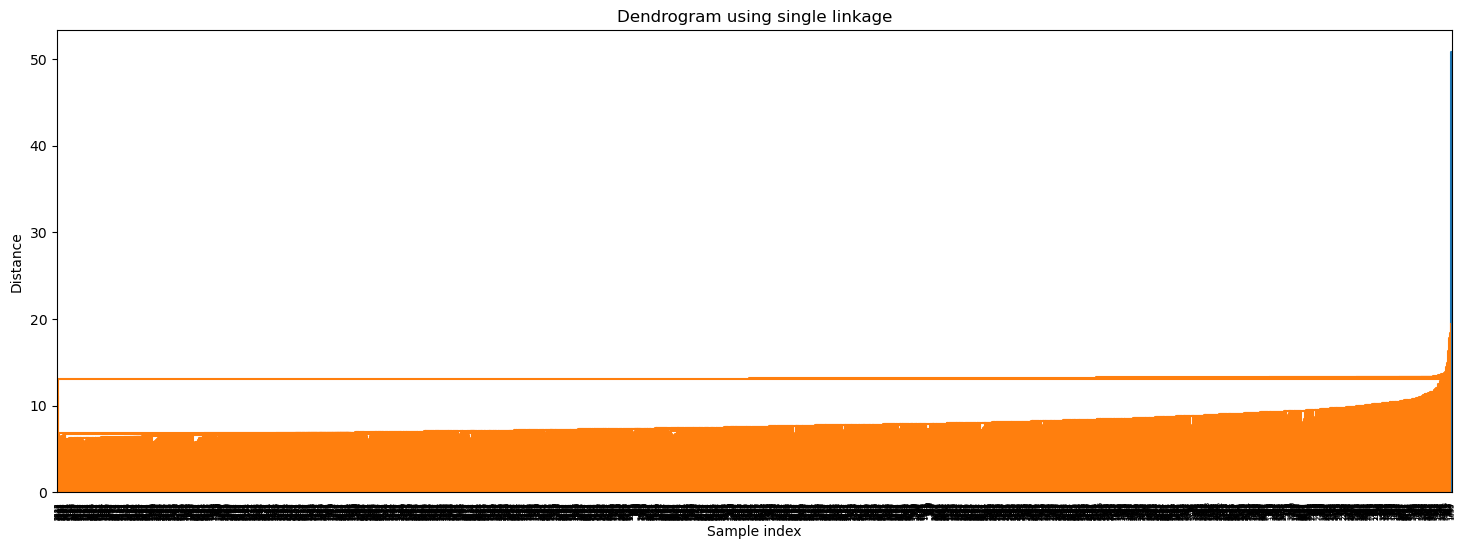

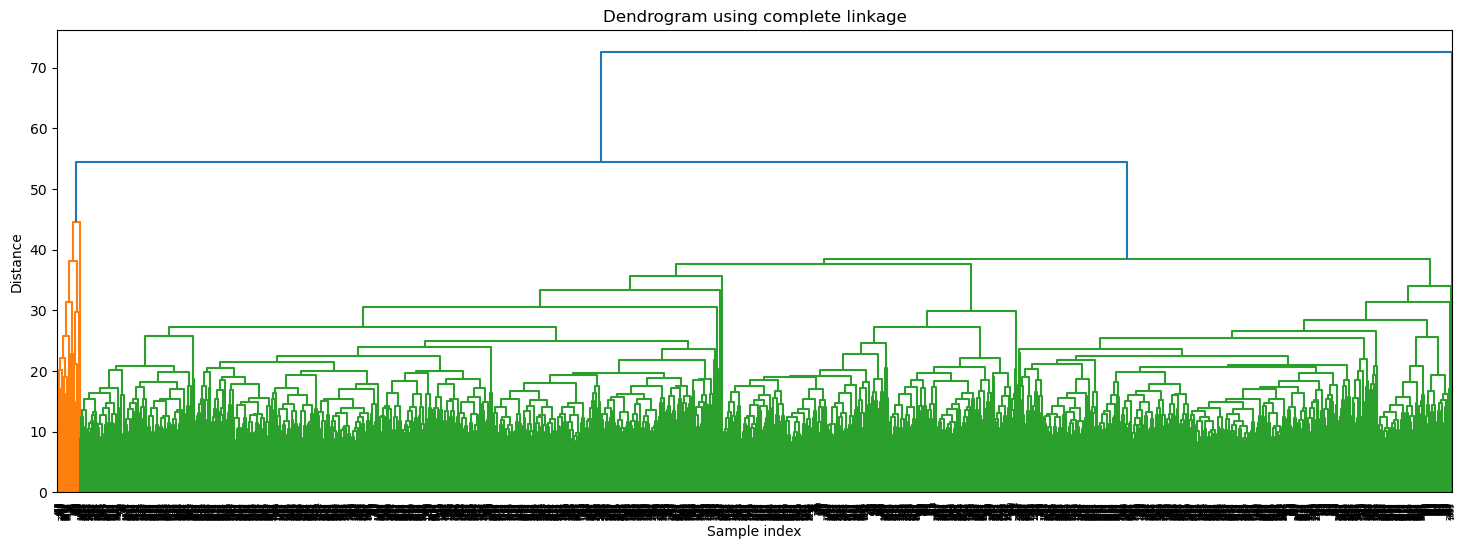

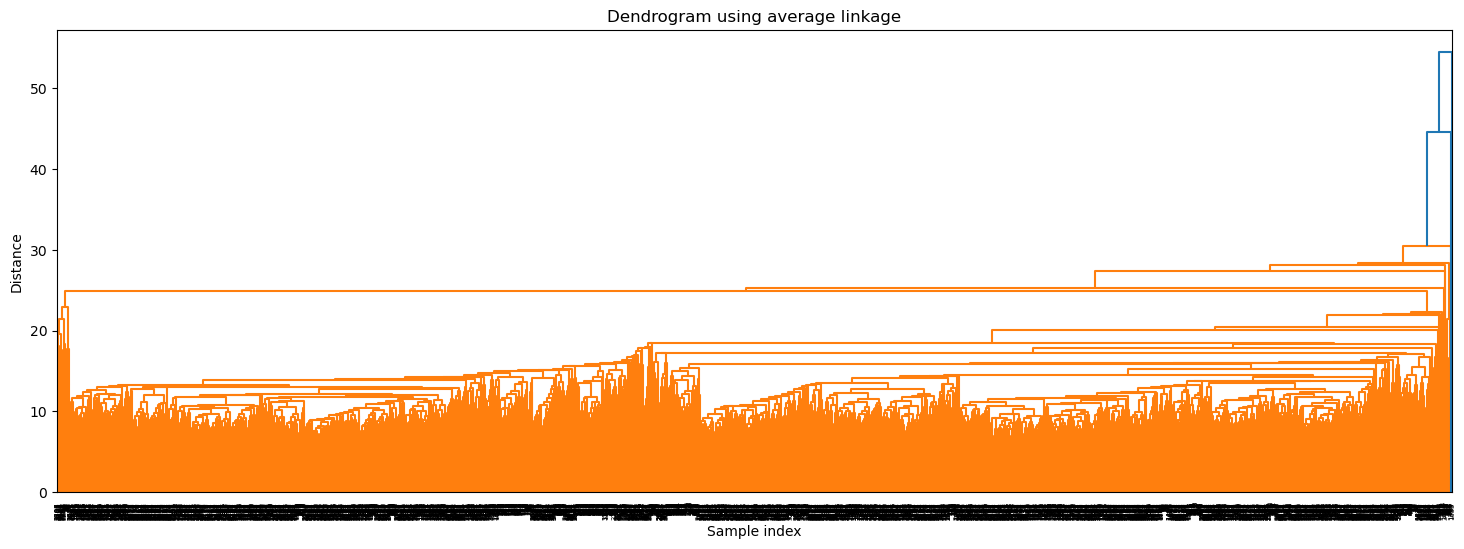

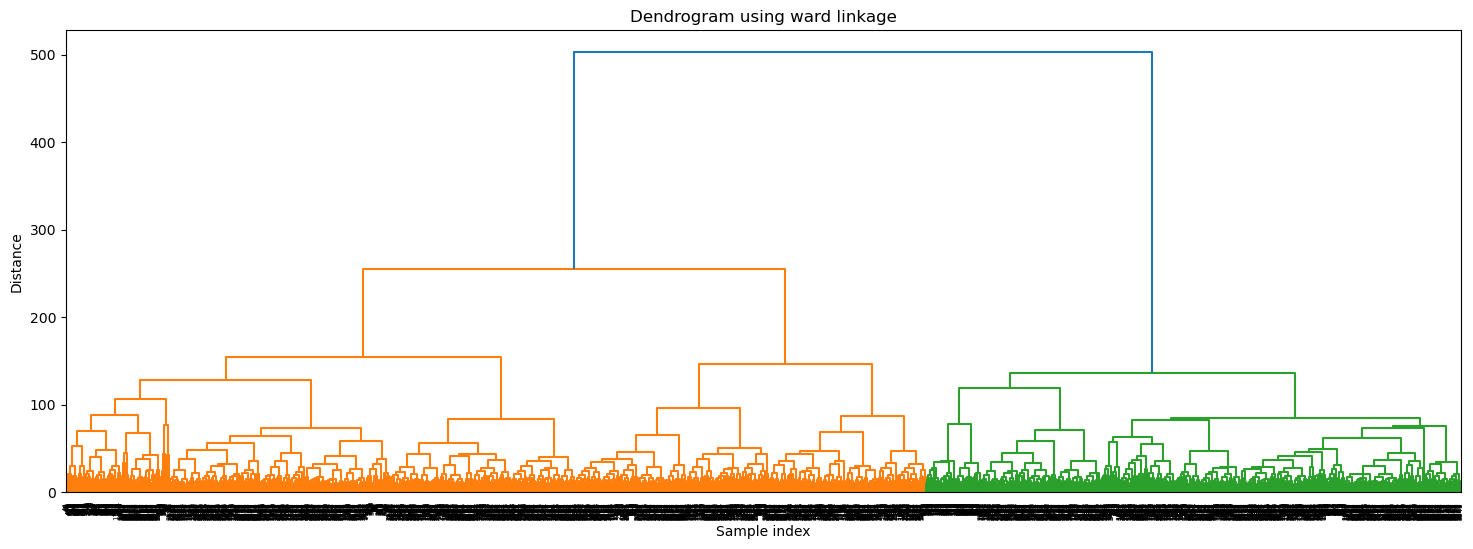

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Methods to use for linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform the linkage
    linked = linkage(scaled_weather_df, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(18,6))
    dendrogram(linked, orientation='top', distance_sort='descending', leaf_rotation=90, show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [46]:
# Extracting data for the 2022
weather_2022 = climate[climate['DATE'].dt.year == 2022]

# Drop unnecessary columns like DATE and MONTH for the clustering task
weather_2022_filtered = weather_2022.drop(columns=['DATE', 'MONTH'])

In [47]:
# Scaling the data
scaled_weather_2022 = scaler.fit_transform(weather_2022_filtered)

# Convert back to DataFrame for easy readability
scaled_weather_df2022 = pd.DataFrame(scaled_weather_2022, columns=weather_2022_filtered.columns)

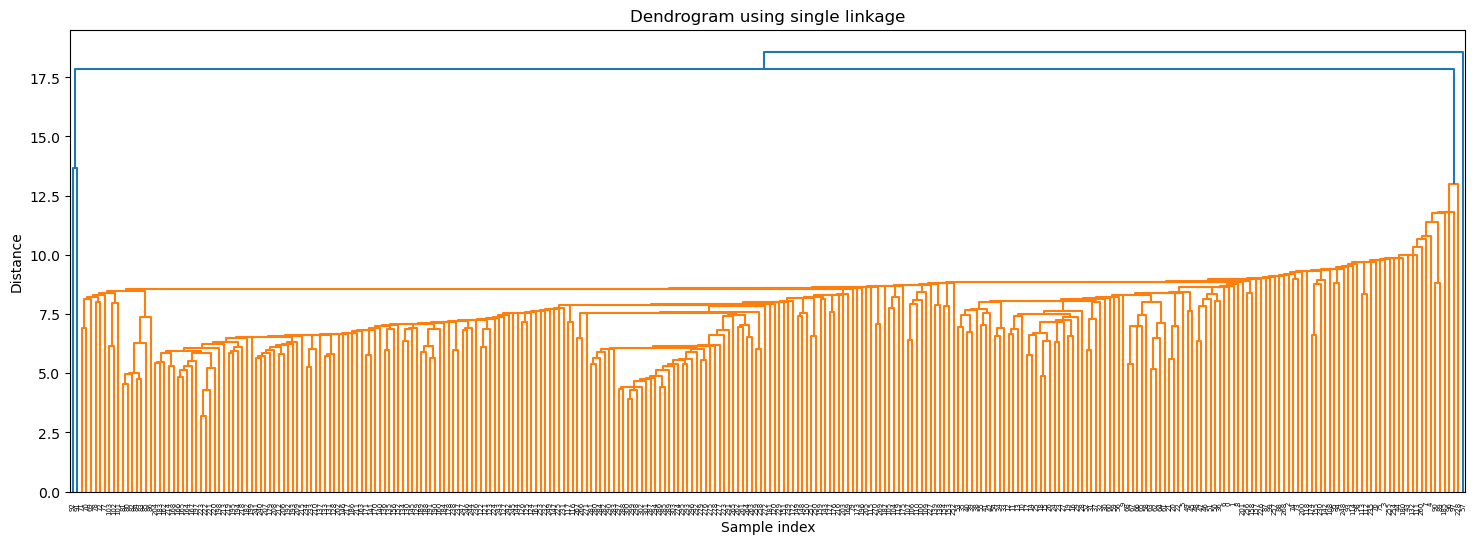

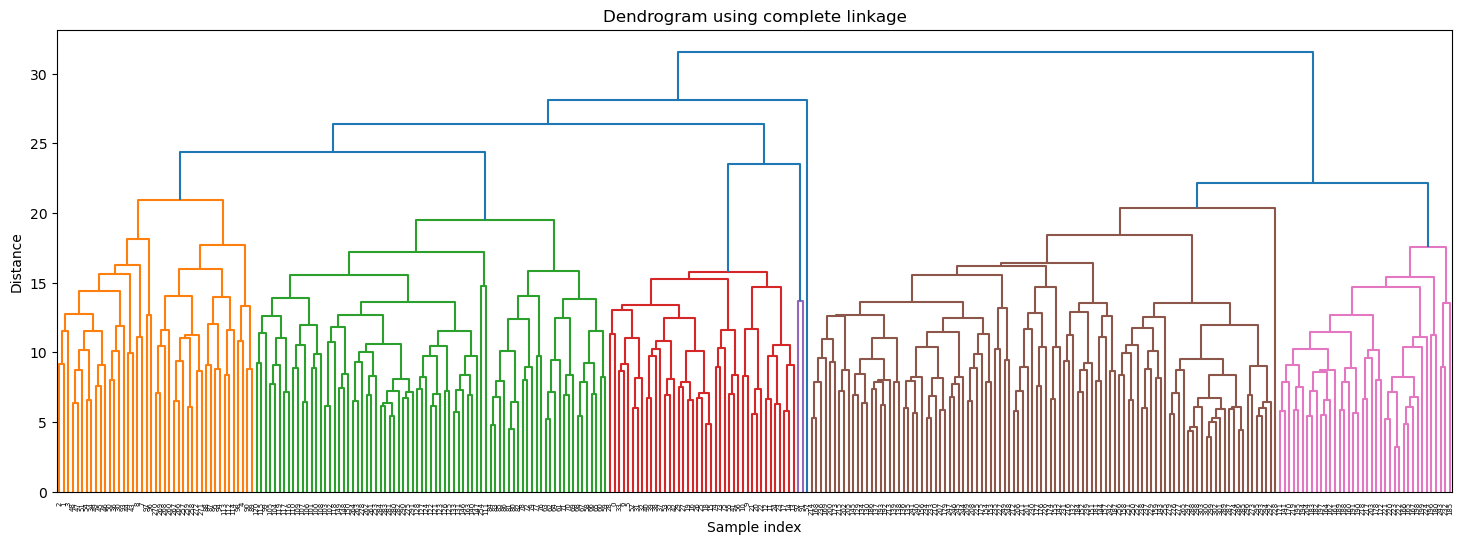

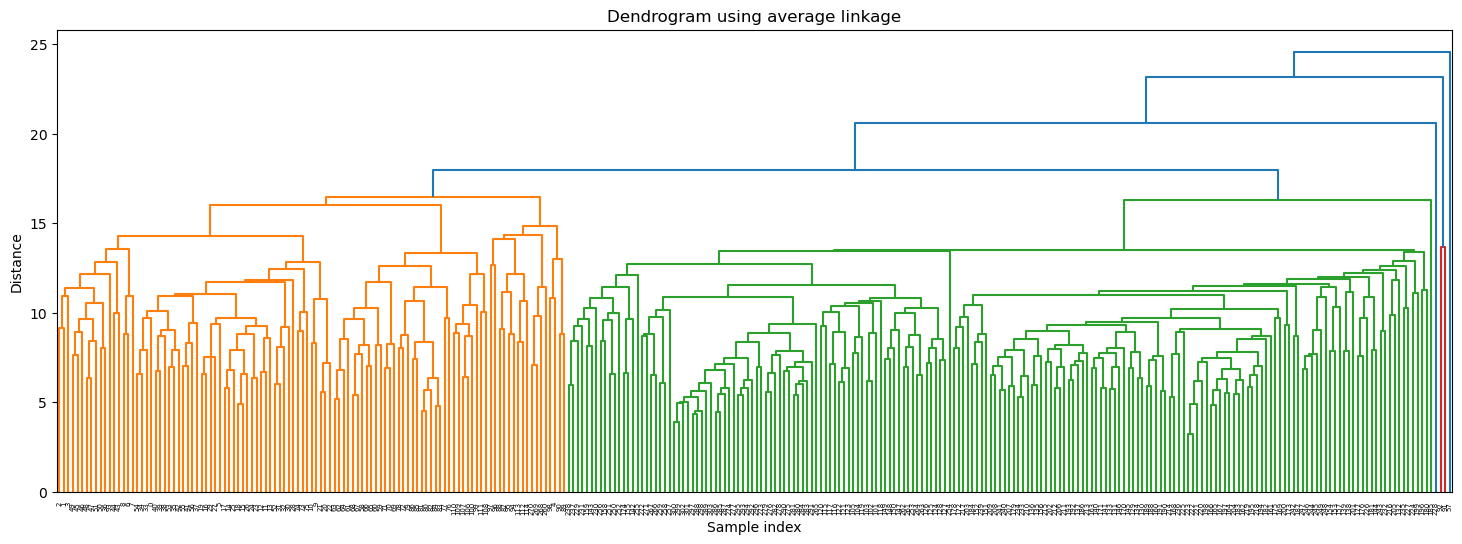

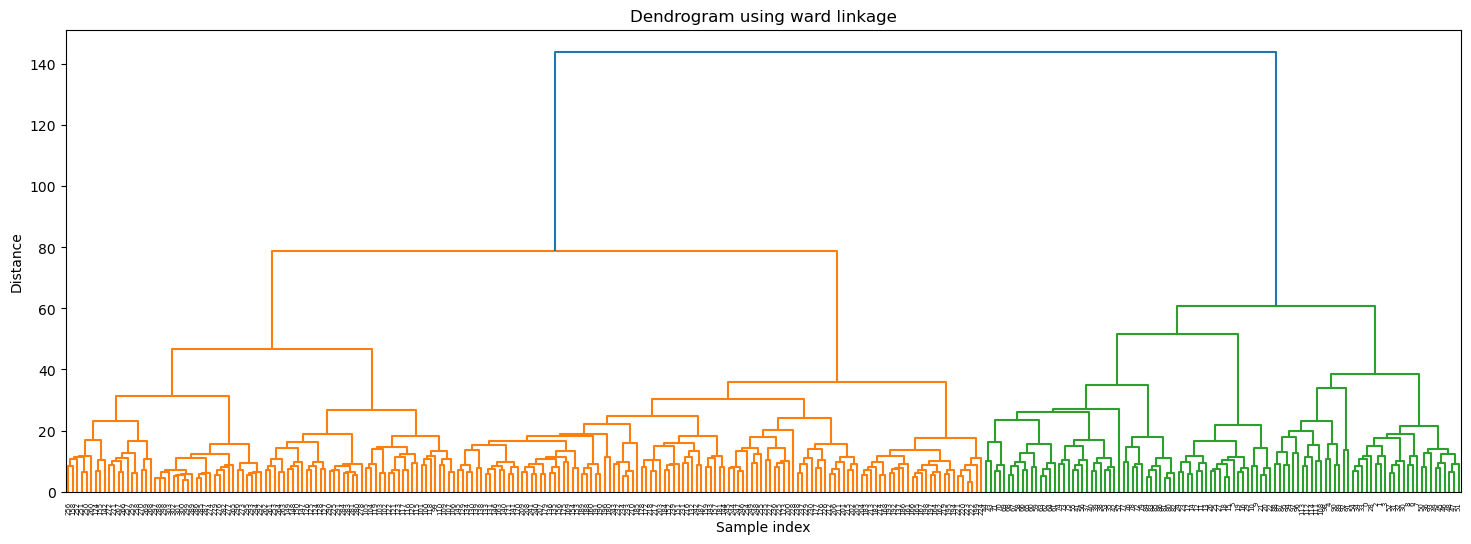

In [48]:
# Methods to use for linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform the linkage
    linked = linkage(scaled_weather_df2022, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(18,6))
    dendrogram(linked, orientation='top', distance_sort='descending', leaf_rotation=90, show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

## 3. Principal Component Analysis (PCA)

In [50]:
from sklearn.decomposition import PCA

# Reducing the data to the number of weather stations (for example, 18 stations)
pca = PCA(n_components=18)
pca_weather_data = pca.fit_transform(scaled_weather_df2022)

# Convert back to DataFrame
pca_weather_df = pd.DataFrame(pca_weather_data)


# Check the explained variance ratio to understand how much information is retained
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total variance explained by the first 18 components: {explained_variance.sum()}')

Explained variance by each component: [0.38035357 0.12049386 0.05808944 0.04344288 0.03113784 0.02543463
 0.02174925 0.01752867 0.01738959 0.01587001 0.01481997 0.01386256
 0.01229183 0.011148   0.01031222 0.00934639 0.00904673 0.00870052]
Total variance explained by the first 18 components: 0.82101797207719


### The first 18 components collectively explain 82.10% of the total variance in the data. This is quite high, meaning that by keeping these 18 components, we're retaining a significant portion of the information in the original data.

### With 82.10% of the variance captured by just 18 components (out of potentially many original features), PCA has significantly reduced the complexity of the data while still preserving most of the important information. This makes the data more manageable and can improve the efficiency of further machine learning models.

In [52]:
pca_weather_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,1.62,-0.44,-1.64,-0.54,-1.34,-0.79,0.28,0.27,-0.22
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,0.07,0.99,0.51,-1.00,-1.57,0.55,-0.30,-1.35,0.34
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,0.05,-0.16,-0.41,-0.74,-2.48,-0.49,-0.07,0.80,1.06
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,-1.94,1.38,-1.06,2.47,-1.97,-1.33,0.60,-1.36,1.95
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,-0.54,1.38,-1.80,-0.21,2.49,-1.92,1.53,0.63,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2.19,0.58,1.53,0.31,1.01,0.83,-0.52,0.06,-0.32
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2.31,0.45,0.78,0.41,0.57,0.15,-0.13,0.21,-0.26
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2.08,0.04,1.51,1.45,0.93,-0.96,-0.16,0.15,-0.13
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,1.41,-0.71,0.90,0.93,0.59,0.23,-0.23,-0.21,-0.42


In [53]:
# Export the reduced dataset to a CSV
pca_weather_df.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'pca_weather_data.csv'), index=False)

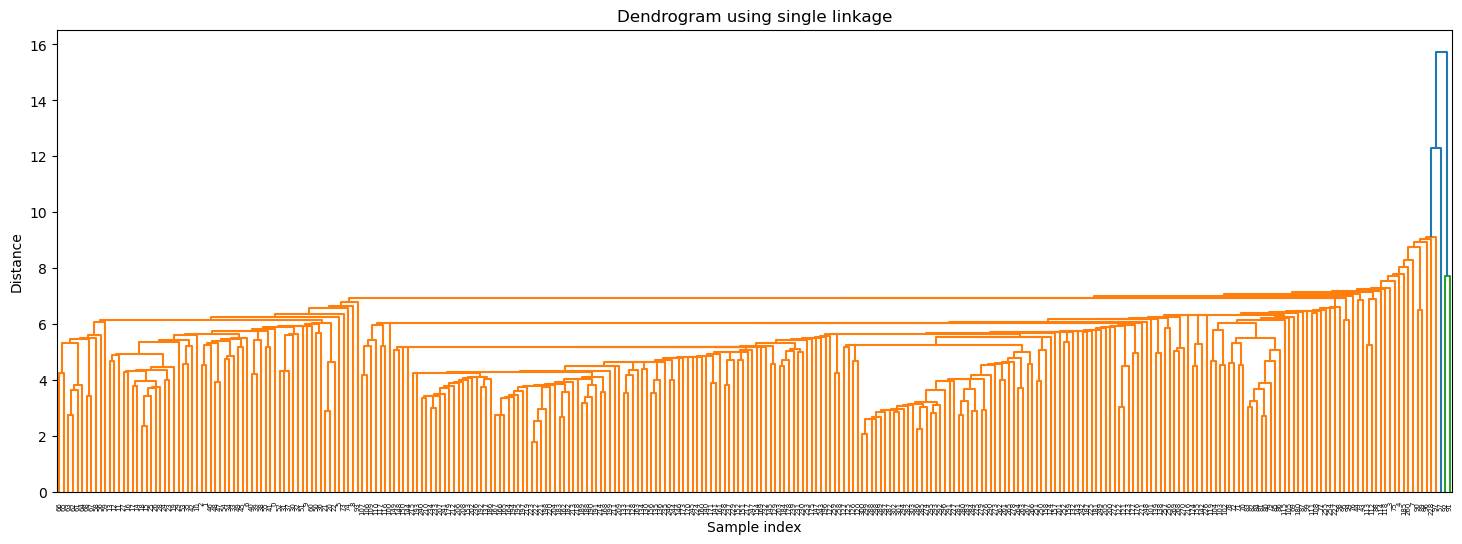

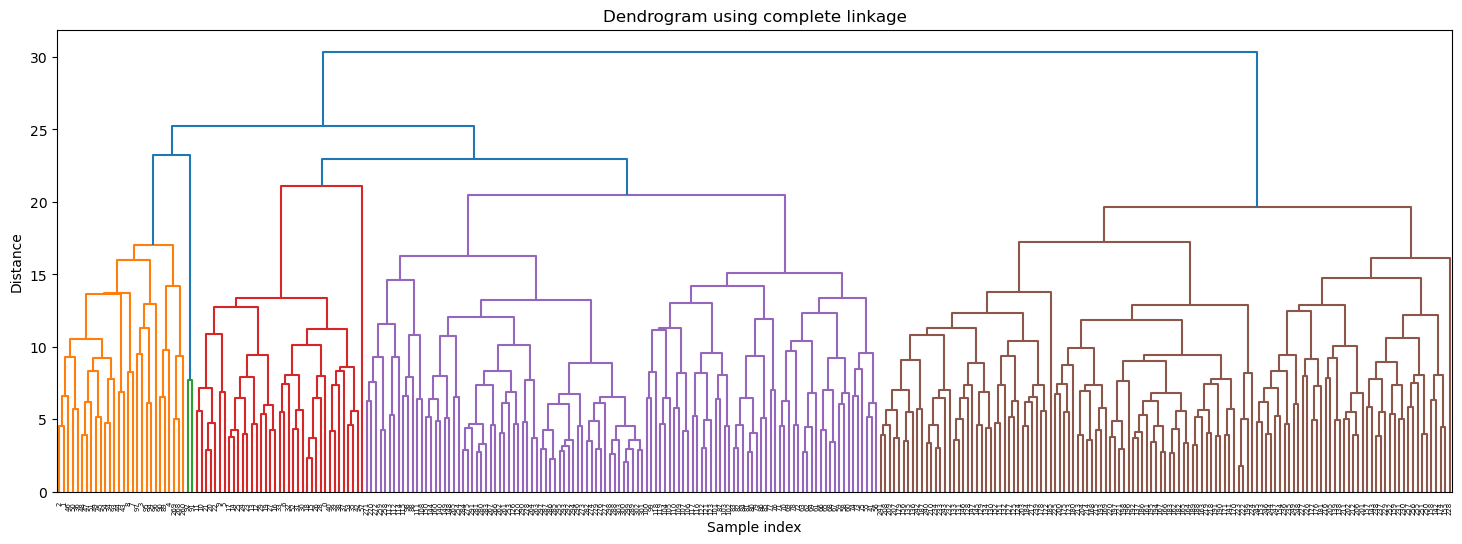

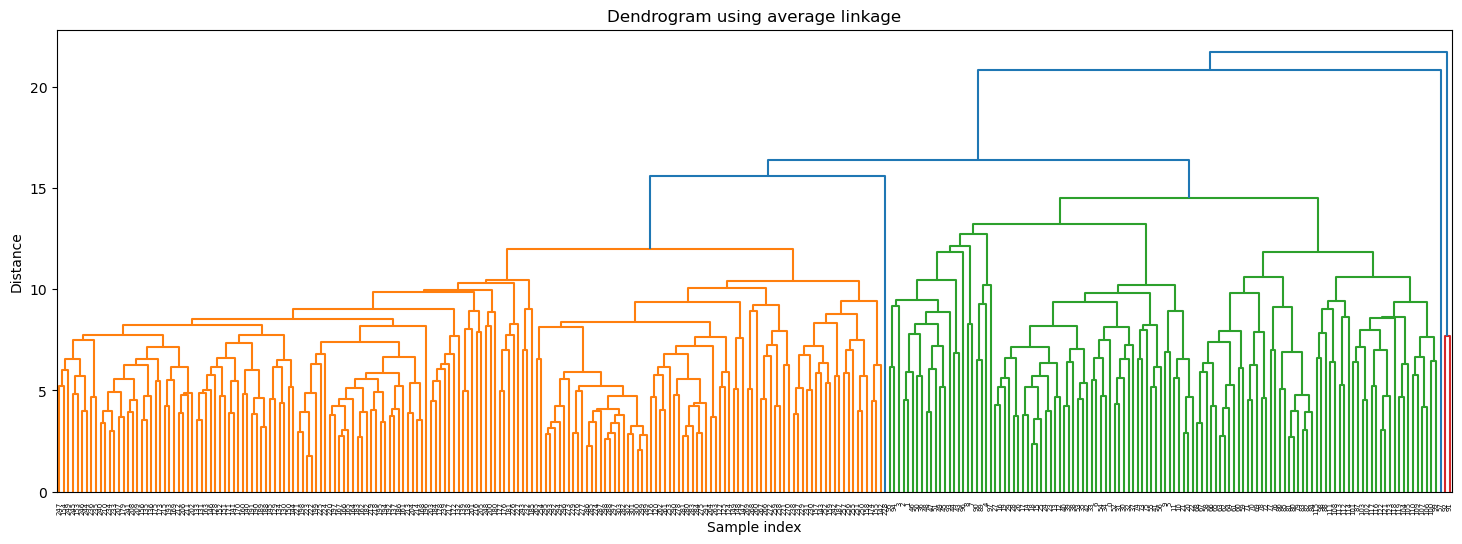

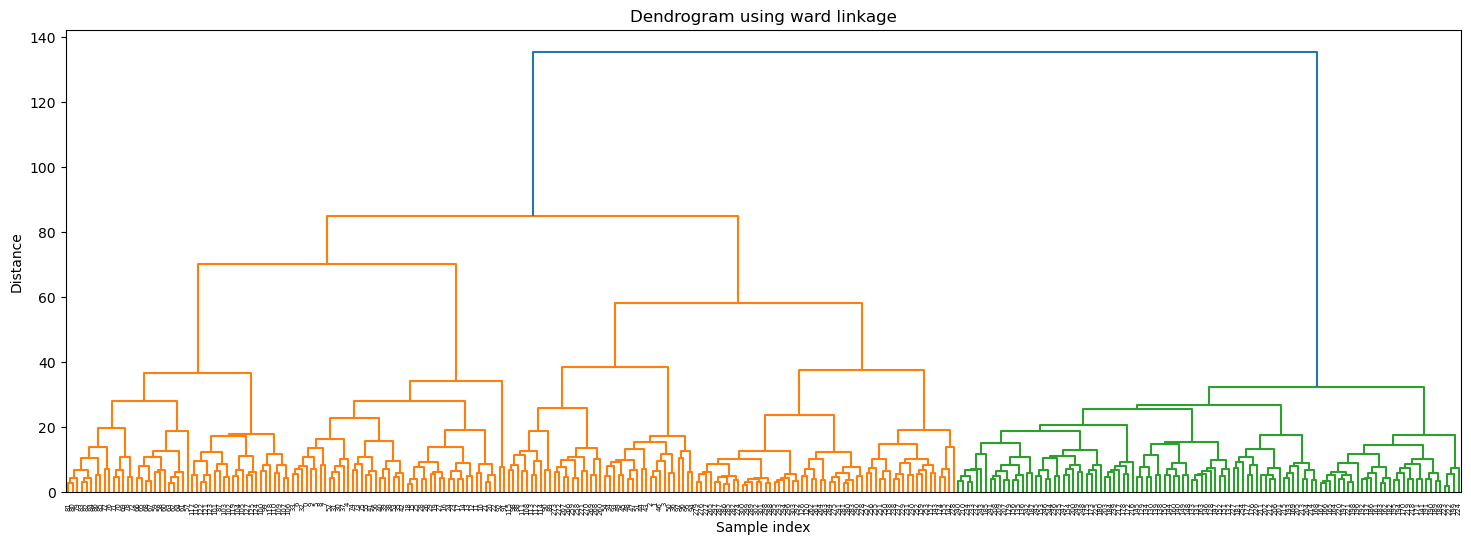

In [54]:
# Methods to use for linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform the linkage
    linked = linkage(pca_weather_df, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(18,6))
    dendrogram(linked, orientation='top', distance_sort='descending', leaf_rotation=90, show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

### Before PCA:

### Clustering Methods:
#### The dendrograms generated using different linkage methods (single, complete, average, and ward) showed different levels of clustering and variability in distances.

### Ward’s linkage:
#### Generally, it provides more structured and distinct clusters because it minimizes the variance within each cluster. The larger distances (height) in this dendrogram reflect that it attempts to form well-separated groups.

### Single linkage:
#### This method tends to form long chains of clusters (closer data points are merged first), which can lead to less defined clusters. The result here looks stretched with small distances between clusters.

### Complete and average linkage:
#### These methods find a balance between variance and distance, with average linkage generally performing better when you want to balance variance within clusters.

### Insights:
#### Without applying PCA, the dendrograms from different linkage methods reflect that clusters could be identified but there’s likely a lot of noise in the data (many small distances in the dendrograms). The scale of distances is relatively small, indicating a dense data structure.

### After PCA:

### Variance Explanation:
#### The PCA analysis showed that the first few components capture a significant portion of the variance (around 82.1% explained by the first 18 components). This means PCA successfully reduced dimensionality while retaining most of the important information.

### Dendrogram:
#### The dendrograms generated after-PCA look much clearer in terms of cluster separation, especially with ward and complete linkage methods. This indicates that dimensionality reduction helped in clarifying the inherent clusters in the data.

### Clustering Methods:
#### The structure of the dendrograms after-PCA is much more distinct. For example:

### Ward and complete linkage:
#### After-PCA, these linkage methods create well-defined clusters with a clearer hierarchy, indicating that the dimensionality reduction allowed for better separation of clusters.

### Single linkage:
#### Even after PCA, this method still appears to form less clear clusters. It’s typically not as effective for this type of structured data.

### Insights:
#### After PCA, the clustering process becomes more efficient and informative, indicating that reducing the complexity of the dataset allowed for better groupings of the weather stations.
#### The dendrograms show possible groups of weather patterns or stations that share similar behaviors, which can provide insights into how different regions in Europe are affected by weather changes over time